<a href="https://colab.research.google.com/github/HumyraT/HumyraT/blob/main/Copy_of_Lab3_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Gesture Recognition using Convolutional Neural Networks

In this lab you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Load and split data for training, validation and testing
2. Train a Convolutional Neural Network
3. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1PGLGsq6k53hd3fZ22PusYzRtilRFgG0P?usp=sharing

Please note that thorughout the lab, I ran into errors and I spent over 20 hours on this lab trying to figure it out. I did my best to write the code and did my best to answer all the questions, making assumptions when needed. Although some parts of the code may not work (more so towards the end), please consider my efforts towards my mark. Thank you.

## Dataset

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing. The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
)



































In [3]:
#import the relevant libraries
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [11]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#directory where the dataset is located
file_dir = "/content/drive/MyDrive/APS360/Lab3Dataset/Lab3_Gestures_Summer"

In [4]:
#will use splitfolers library to split all dataset into training, validation, and testing data
!pip install split-folders
import splitfolders # or import splitfolders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
output = "/content/drive/MyDrive/APS360/" #where the training, validation, and testing data will be saved
#put 80% for training, 10% of data for validation and 10% of data for testing
#80% for training set because the training data is what actually trains the model, so this should be quite large
#the validation set is for the tuning of hyperparamaters so it should be smaller than the training set but large enough to efficiently tune hyperparameters
#the testing set is also 10% to check the accuracy of our model
#this will take 80%, 10%, and 10% from each letter (i.e. 80% from A, 10% from A, and 10% from A)

splitfolders.ratio(file_dir, output=output, seed=10, ratio=(.8, .1, .1))

1771
217
233


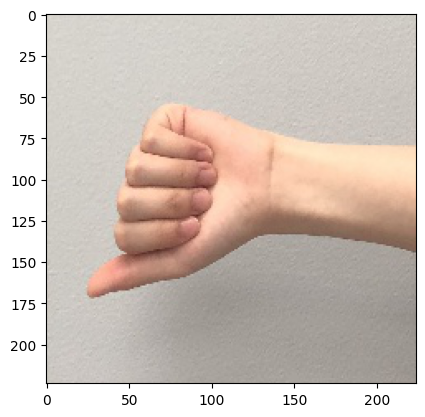

In [12]:
#Load the data
train_data = torchvision.datasets.ImageFolder("/content/drive/MyDrive/APS360/train", transform=transforms.ToTensor())
val_data = torchvision.datasets.ImageFolder("/content/drive/MyDrive/APS360/val", transform=transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder("/content/drive/MyDrive/APS360/test", transform=transforms.ToTensor())

train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=64, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=64, num_workers=1, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=64, num_workers=1, shuffle=True)

print(len(train_data))
print(len(val_data))
print(len(test_data))

#plotting an example from data
train_data[0][0].shape
img = train_data[0][0]
img = np.array(img.transpose(0,2))
plt.imshow(img)



There are 1772 images for the training set, 217 for the validation set, and 230 for the testing set.

### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [6]:
#Convolutional Neural Network Architecture
torch.manual_seed(10)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "CNN"
        #3 in channels because it is RGB
        #set kernel size as 5x5 and picked 5 kernels
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        #output is (224+0-5)/1 +1 =  220 with 5 channels

        #chose max pooling because it works better than average pooling
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        #output is (220-2)/2 + 1 = 110
        #110 with 5 channels

        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        #output is (110-5)/1 + 1 = 106 with 10 channels
        #then pool again so (106-2)/2 + 1 = 53

        self.fc1 = nn.Linear(10*53*53, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x)) #flatten the features from the convnet
        x = self.fc2(x)
        return x

 I chose a CNN model with 6 layers in total. I used 2 convolutional layers, 2 pooling layers, and 2 fully conneced layers. The beggining input channels were 3 because it was RGB, then since it is a standard to set kernel sizes to 5x5, I set the k to 5 as well for the first convolutional layer. The input image goes throgh a convolution, and then it goes through a relu function, and then through the pooling layer. Then again, it goes through another convolution, relu function, and pooling layer. For the pooling layer, I selected max pooling as it works a bit better than average pooling (that is why my stride is 2 and kernel size is 2x2). For my second convolutional layer, I increased the number of channels to 10, as the deeper the network, the more channels are needed to represent complex features. Lastly, for the activation function, I used ReLU because it is used most commonly in practice.



### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [7]:
#helps with the checkpointing of model
def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [8]:
#gets accuracy of model
def get_accuracy(model, batch_size, train=False):
  #will use training data set or validation data set depending on input
    if train:
        data = train_data
    else:
        data = val_data

    correct = 0
    total = 0
    #loads the dataset
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [9]:
#trains the model
def train(model, train_data, batch_size=64, lr = 0.001, num_epochs=1):
    torch.manual_seed(10)
    train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    #val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
      #goes through training data
        for imgs, labels in iter(train_data_loader):


            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################


            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model,batch_size, train=True)) # compute training accuracy
            val_acc.append(get_accuracy(model,batch_size,train=False))  # compute validation accuracy
            n += 1

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, lr, epoch)
        torch.save(model.state_dict(), model_path)

# plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


I chose the cross entropy loss function for the loss function and the Adam optimizer. Adam optimizer combines stochastic gradient descent with adaptove learning rates, and leads to rapid convergence, requires minimal tuning, and is a commonly used optimizer. Also, I used the cross-entropy loss function because that is what is used for classification problems.

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
#overfit to a small dataset
file_dir = "/content/drive/MyDrive/APS360/train"
output = "/content/drive/MyDrive/APS360/Small_Dataset"

#this will take the training set that I previously created, and split it into a new "Training, validaiton, and test" set.
#I will then use the new "training" set as my small dataset.
#this is about 60 images in the small_dataset that I will be using
splitfolders.ratio(file_dir, output=output, seed=10, ratio=(.036, .864, .1))





Copying files: 0 files [00:00, ? files/s]
Copying files: 3 files [00:00, 20.68 files/s]
Copying files: 11 files [00:00, 47.89 files/s]
Copying files: 25 files [00:00, 75.27 files/s]
Copying files: 39 files [00:00, 94.13 files/s]
Copying files: 51 files [00:00, 99.84 files/s]
Copying files: 62 files [00:00, 102.29 files/s]
Copying files: 77 files [00:00, 112.16 files/s]
Copying files: 89 files [00:00, 111.69 files/s]
Copying files: 101 files [00:01, 112.83 files/s]
Copying files: 113 files [00:01, 111.94 files/s]
Copying files: 127 files [00:01, 118.04 files/s]
Copying files: 139 files [00:01, 116.52 files/s]
Copying files: 151 files [00:01, 114.92 files/s]
Copying files: 164 files [00:01, 116.91 files/s]
Copying files: 176 files [00:01, 113.49 files/s]
Copying files: 188 files [00:01, 113.47 files/s]
Copying files: 200 files [00:02, 83.12 files/s] 
Copying files: 212 files [00:02, 90.84 files/s]
Copying files: 223 files [00:02, 92.97 files/s]
Copying files: 235 files [00:02, 95.26 fil

In [10]:
small_dataset = torchvision.datasets.ImageFolder("/content/drive/MyDrive/APS360/Small_Dataset/train", transform=transforms.ToTensor())


In [11]:
def get_accuracy_small(model, batch_size):
    small_dataset_loader = torch.utils.data.DataLoader(small_dataset, batch_size=batch_size)

    correct = 0
    total = 0
    for imgs, labels in small_dataset_loader:


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [12]:
def train_small(model, data, batch_size=62, lr = 0.001, num_epochs=1):
    torch.manual_seed(10)
    small_dataset_loader = torch.utils.data.DataLoader(small_dataset, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(small_dataset_loader):


            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################


            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_small(model, batch_size)) # compute training accuracy
            #val_acc.append(get_accuracy_small(model,train=False))  # compute validation accuracy
            n += 1

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, lr, epoch)
        torch.save(model.state_dict(), model_path)

# plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    #plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
   # print("Final Validation Accuracy: {}".format(val_acc[-1]))

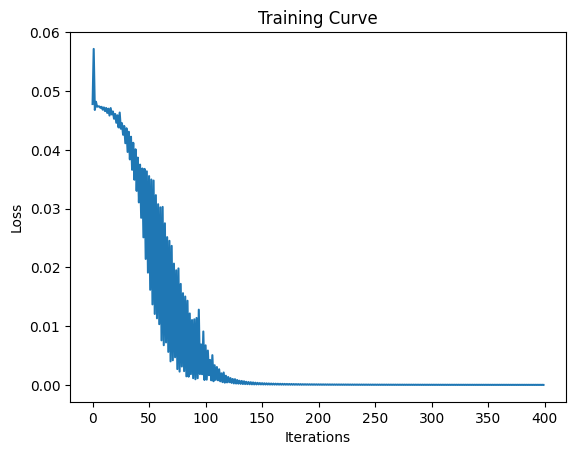

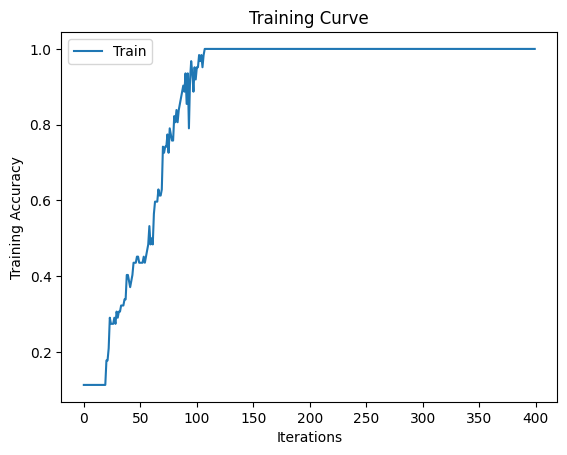

Final Training Accuracy: 1.0


In [23]:
use_cuda = True
model = CNN()

 #############################################
            #To Enable GPU Usage
if use_cuda and torch.cuda.is_available():
  model.cuda()
  #############################################

train_small(model, small_dataset, batch_size=48, lr = 0.001, num_epochs=200)

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

I think the 3 hyperparameters that are worth tuning are the learning rate, the batch size, and the number of layers in the CNN.

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

Model 1: Keeps a learning rate of 0.001, batch size of 256, but the number of fully connected layers is now 3 instead of 2.

In [55]:
#Convolutional Neural Network Architecture
class CNN_model1(nn.Module):
    def __init__(self):
        super(CNN_model1, self).__init__()
        self.name = "CNN Model 1"
        #3 in channels because it is RGB
        #set kernel size as 5x5 and picked 5 kernels
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        #output is (224+0-5)/1 +1 =  220 with 5 channels

        #chose max pooling because it works better than average pooling
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        #output is (220-2)/2 + 1 = 110
        #110 with 5 channels

        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        #output is (110-5)/1 + 1 = 106 with 10 channels
        #then pool again so (106-2)/2 + 1 = 53

        self.fc1 = nn.Linear(10*53*53, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x)) #flatten the features from the convnet
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

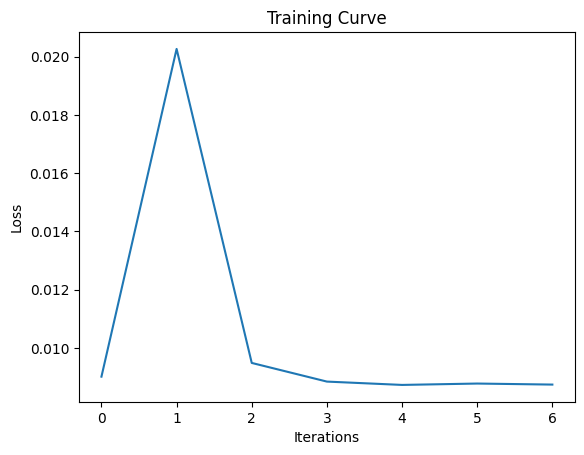

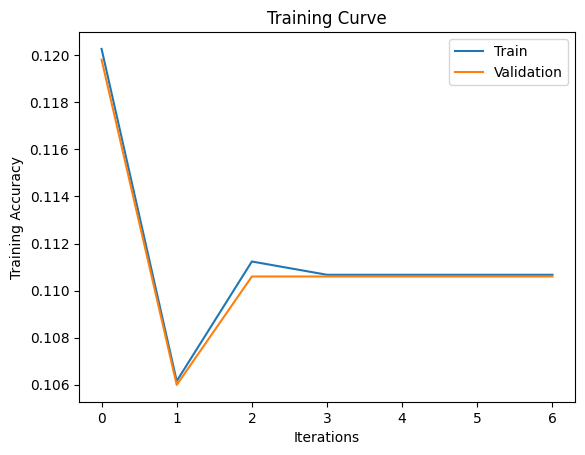

Final Training Accuracy: 0.11067193675889328
Final Validation Accuracy: 0.11059907834101383


In [62]:
use_cuda = True
model1 = CNN_model1()

 #############################################
            #To Enable GPU Usage
if use_cuda and torch.cuda.is_available():
  model1.cuda()
  #############################################

train(model1,train_data, batch_size=256, lr = 0.01, num_epochs=1)

Model 2 uses the same default parameters but changes the batch size by increasing it.

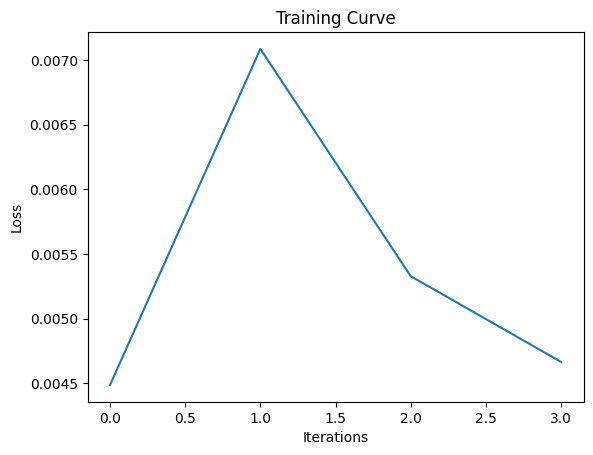

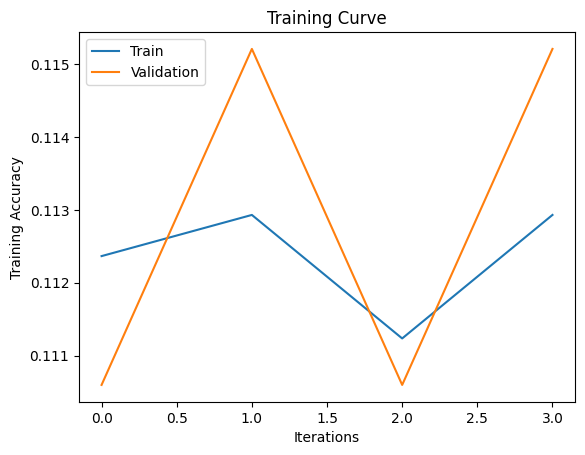

Final Training Accuracy: 0.11293054771315642
Final Validation Accuracy: 0.1152073732718894


In [58]:
use_cuda = True
model2 = CNN()

 #############################################
            #To Enable GPU Usage
if use_cuda and torch.cuda.is_available():
  model2.cuda()
  #############################################

train(model2,train_data, batch_size=512, lr = 0.001, num_epochs=1)

Model 3 uses the same default paramaters but changes the learning rate by increasing it.

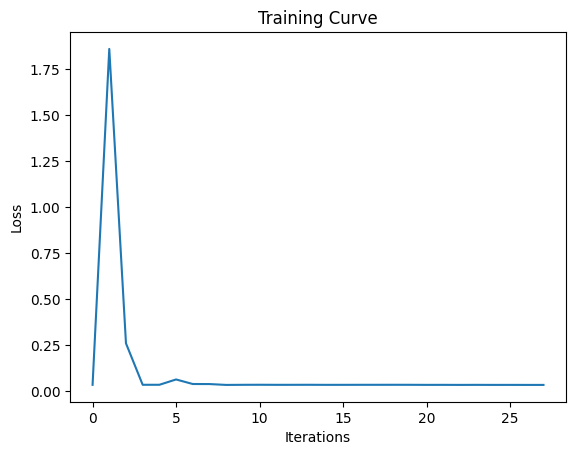

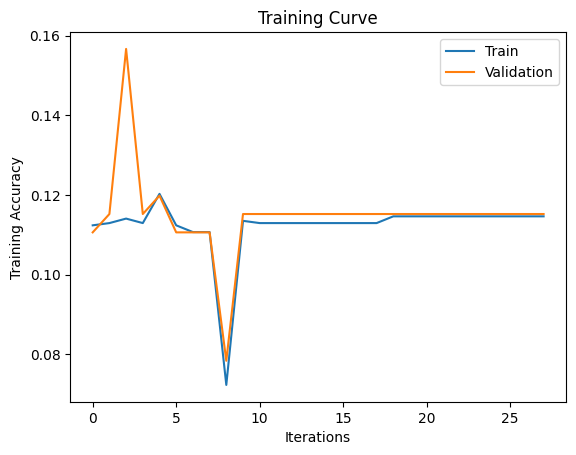

Final Training Accuracy: 0.11462450592885376
Final Validation Accuracy: 0.1152073732718894


In [63]:
use_cuda = True
model3 = CNN()

 #############################################
            #To Enable GPU Usage
if use_cuda and torch.cuda.is_available():
  model3.cuda()
  #############################################

train(model3,train_data, batch_size=64, lr = 0.01, num_epochs=1)

Model 4 uses the same default paramaters but changes the learning rate by decreasing it. Due to time limits and technical difficulties, I also increased the bacth size to 256.

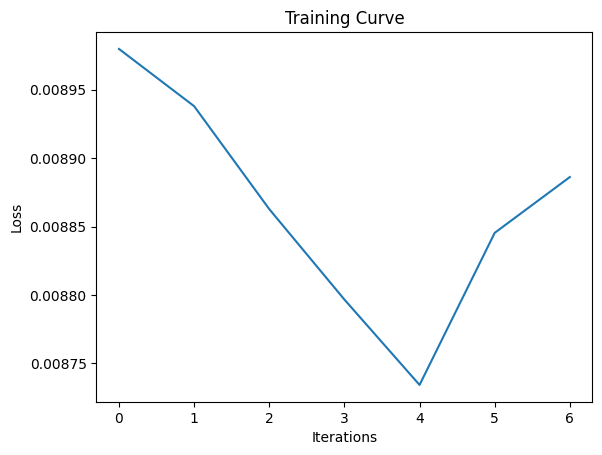

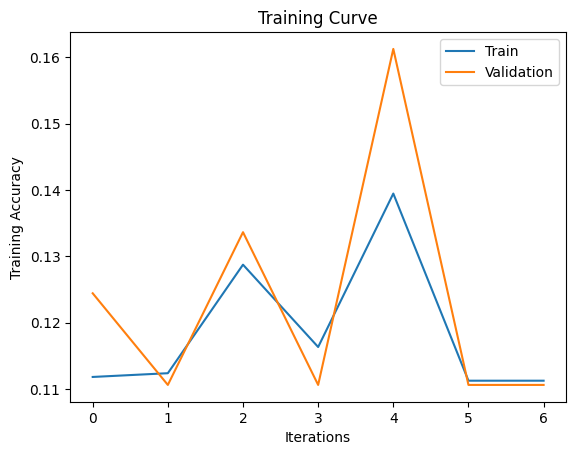

Final Training Accuracy: 0.11123658949745906
Final Validation Accuracy: 0.11059907834101383


In [66]:
use_cuda = True
model4 = CNN()

 #############################################
            #To Enable GPU Usage
if use_cuda and torch.cuda.is_available():
  model4.cuda()
  #############################################

train(model4,train_data, batch_size=256, lr = 0.0001, num_epochs=1)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

Please note that the GPU of my google collab stopped working and said that I've used the max usage and would need to pay for more. That is why, due to time, I only ran 1 epoch for each model, and obviously recognise this is not the best way to train the model and pick which model is the best, but when I would run more than 1 epoch, the model would run for 10 min and then crash. Therefore, I picked the best model by running each one for only 1 epoch. Based on this, model 1 is the best model out of all the ones that I trained. Since I used an adam optimizer, changing the learning rate would not have much effect on the model. Additionally, with an increased batch size, the final accuracy does seem to be a bit higher than model 1, however, looking at the graph, it seems to bounce up and down, which makes me think that if I were to run this for more epochs, it would not converge. Lastly, model 1 works the best as although the accuracy is slightly lower, the training and validation set are similar, which means there is minimal overfitting and it does not seem to bounce up and down. If I were able to run it for more epochs, I predict that it would increase and would be able to achieve a high accuracy.

In [74]:
best_model = CNN_model1()
best_model_path = get_model_name(best_model.name, batch_size=256, learning_rate=0.01, epoch=1)
state = torch.load(best_model_path)
best_model.load_state_dict(state)

<All keys matched successfully>

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [78]:
def get_accuracy_test(model, batch_size):
    test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

    correct = 0
    total = 0
    for imgs, labels in test_data_loader:


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [79]:
get_accuracy(best_model, 256)

0.11059907834101383

The test accuracy of my model is: 0.11059907834101383.

### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [4]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:07<00:00, 31.8MB/s]


The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [7]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
#features = alexnet.features(img)

In [13]:
train_data[0][0].unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [14]:
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=1, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=1, num_workers=1, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=1, num_workers=1, shuffle=True)

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

n=0
for img, label in train_data_loader:
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = "/content/drive/MyDrive/APS360/train/" + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n+=1

for imgs, labels in (val_data_loader):
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = "/content/drive/MyDrive/APS360/val/" + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n+=1

for imgs, labels in (test_data_loader):
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = "/content/drive/MyDrive/APS360/test/" + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n+=1


### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [50]:
# features = ... load precomputed alexnet.features(img) ...
output = new_model(features)
prob = F.softmax(output)

<ipython-input-50-e2cdc85591ff>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = F.softmax(output)


In [34]:
features.shape

torch.Size([1, 256, 6, 6])

In [15]:
#Convolutional Neural Network Architecture
torch.manual_seed(10)
class CNN_features(nn.Module):
    def __init__(self):
        super(CNN_features, self).__init__()
        self.name = "CNN features"
        #256 in channels and 6 image size
        #set kernel size as 5x5 and picked 512 output channels
        self.conv1 = nn.Conv2d(256, 256, 5) #in_channels, out_chanels, kernel_size
        #output is (6+0-5)/1 +1 =  2 with 512 channels
        #chose max pooling because it works better than average pooling
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
        #output is (2-2)/2 + 1 = 1
        #1 with 512 channels
        self.fc1 = nn.Linear(256*1*1, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 256*1*1)
        x = F.relu(self.fc1(x)) #flatten the features from the convnet
        x = self.fc2(x)
        return x

I chose a model with 1 convolutional layer, where the kernel size was 5. I chose only 1, as if I had picked more layers, then, the image size becomes less than 6. So I picked 1 convolutional layer, and then 1 pooling layer. Then, I picked 2 fully-connected layers. I picked these layers, as it worked for previous questions above.

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [21]:
#tensor = torch.from_numpy(tensor.detach().numpy())

In [16]:
train_data_alex = torchvision.datasets.DatasetFolder('/content/drive/MyDrive/APS360//train', loader=torch.load, extensions=('.tensor'))

In [17]:
def train_alex(model, data, batch_size=62, lr = 0.001, num_epochs=1):
    torch.manual_seed(10)
    alex_loader = torch.utils.data.DataLoader(train_data_alex, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for features, labels in iter(alex_loader):


            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              features = features.cuda()
              labels = labels.cuda()
            #############################################


            out = model(features)         # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_alex(model, batch_size)) # compute training accuracy
            #val_acc.append(get_accuracy_small(model,train=False))  # compute validation accuracy
            n += 1

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, lr, epoch)
        torch.save(model.state_dict(), model_path)

# plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    #plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
   # print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [18]:
def get_accuracy_alex(model, batch_size):
    alex_loader = torch.utils.data.DataLoader(train_data_alex, batch_size=batch_size)

    correct = 0
    total = 0
    for features, labels in alex_loader:


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          features = features.cuda()
          labels = labels.cuda()
        #############################################


        output = model(features)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += features.shape[0]
    return correct / total

In [27]:
new_model = CNN_features()

CUDA is not available.  Training on CPU ...


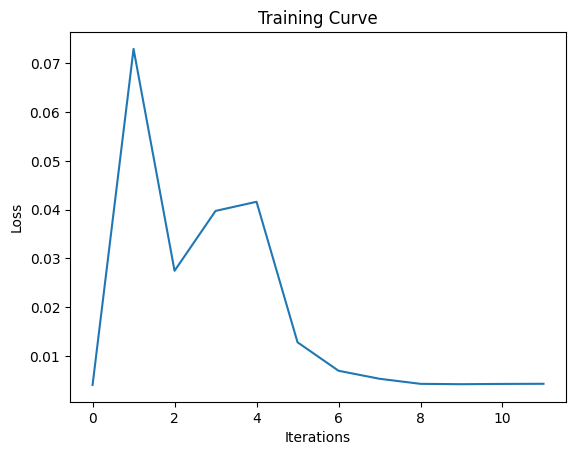

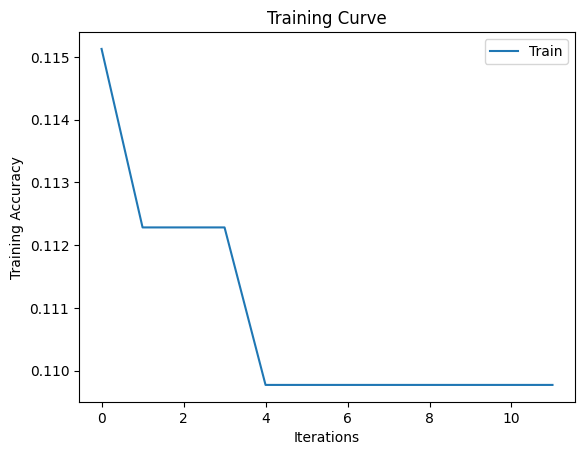

Final Training Accuracy: 0.10977242302543508


In [83]:
use_cuda = True

new_model = CNN_features()
#ALNC = alexnet.features

if use_cuda and torch.cuda.is_available():
  new_model.cuda()
  #ALNC.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train_alex(new_model,train_data_alex, batch_size=512, lr=0.01, num_epochs=1)

In [117]:
#path = get_model_name("CNN features", batch_size=512, learning_rate=0.01, epoch=1)
#state = torch.load(path)
#best_model.load_state_dict(state)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

I am running into an error when using test data. However, I would expect that the test accuracy using transfer learning would be higher than my best model and I would get that accuracy much faster. This is because transfer learning allows us to avoid large computation. Additionally, transfer learning, AlexNet, was trained on GPU, has a deeper and bigger network as well, and is much better than mine and that is why I would epect the model for AlexNet to have much higher test accuracy than mine.

In [19]:
test_data = torchvision.datasets.ImageFolder("/content/drive/MyDrive/APS360/test", transform=transforms.ToTensor())
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=1, num_workers=1, shuffle=True)

In [20]:

for imgs, labels in (test_data_loader):
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = "/content/drive/MyDrive/APS360/test/" + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n+=1

In [21]:
test_data_alex = torchvision.datasets.DatasetFolder('/content/drive/MyDrive/APS360//test', loader=torch.load, extensions=('.tensor'))

FileNotFoundError: ignored

In [22]:
def get_accuracy_alex_test(model, batch_size):
    alex_loader = torch.utils.data.DataLoader(test_data_alex, batch_size=batch_size)

    correct = 0
    total = 0
    for features, labels in alex_loader:


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          features = features.cuda()
          labels = labels.cuda()
        #############################################


        output = model(features)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += features.shape[0]
    return correct / total

In [28]:
get_accuracy_alex_test(new_model, 256)

NameError: ignored

The test accuracy for the AlexNet model is:

### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures.

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

In [24]:
small_dataset_test = torchvision.datasets.ImageFolder("/content/drive/MyDrive/APS360/Small_Dataset/test", transform=transforms.ToTensor())

In [34]:

small_test_data_loader = torch.utils.data.DataLoader(small_dataset_test, batch_size=1, num_workers=1, shuffle=True)

In [ ]:
for imgs, labels in (small_test_data_loader):
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = "/content/drive/MyDrive/Small_Dataset/test/" + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n+=1

In [ ]:
small_test_data_alex = torchvision.datasets.DatasetFolder('/content/drive/MyDrive/APS360//test', loader=torch.load, extensions=('.tensor'))

In [37]:
def get_accuracy_alex_test_small(model, batch_size):
    alex_loader = torch.utils.data.DataLoader(small_test_data_alex, batch_size=batch_size)

    correct = 0
    total = 0
    for features, labels in alex_loader:


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          features = features.cuda()
          labels = labels.cuda()
        #############################################


        output = model(features)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += features.shape[0]
    return correct / total

In [ ]:
use_cuda = True
get_accuracy_alex_test_small(new_model, 256)

Again, I am running into an error due to errors carried over from above.

However, I expect the test accuracy using the transfer model with the small dataset to perform much better than in part 4d because although both are using transfer learning, it wil perform much better on the smaller dataset because transfer learning helps with smaller data sets.If there was no error, I think the model would have done a good job for all of the different hand gestures and I think it would have done well using tranfer learning because trasnfer learning requires less computation and it has bigger and deeper networks. The reason my model did not do so well in comparison was because it only had a few layers. I think if I had made the network a bit larger and a bit deeper, it might have performed better, but not as good as transfer learning obviously.

